# Why Convolutional Neural Networks?

Повністю пов'язані мережі з кількома шарами можуть зробити лише стільки - щоб наблизитись до найсучасніших результатів у класифікації зображень, потрібно заглибитись. Іншими словами, в мережі потрібно набагато більше шарів. Однак, додавши багато додаткових шарів, ми стикаємося з деякими проблемами.

   **По-перше**, ми можемо зіткнутися з проблемою градієнта, що зникає. - однак це може бути вирішено певною мірою за допомогою розумних функцій активації, таких як сімейство активацій ReLU. 
   **Іншим** питанням для глибоко повністю пов'язаних мереж є те, що кількість відстежуваних параметрів у моделі (тобто ваги) може швидко зростати. Це означає, що навчання сповільнюється або стає практично неможливим, а також піддає модель переодягання. То яке рішення?
   
   #### Convolutional Neural Networks 
   
   мережі намагаються вирішити цю другу проблему, використовуючи кореляції між суміжними входами у зображеннях (або часових рядах). Наприклад, у зображенні кішки та собаки пікселі, близькі до котячих очей, швидше співвідносяться з сусідніми пікселями, які показують котячий ніс, а не пікселями на іншій стороні зображення, що представляють собою собачий ніс. Це означає, що не кожен вузол мережі повинен бути підключений до кожного іншого вузла в наступному шарі - і це скорочує кількість вагових параметрів, необхідних для навчання в моделі. У Convolution Neural Networks також є деякі інші хитрощі, які покращують навчання, але ми з ними дійшли в наступному розділі

# How does a Convolutional Neural Network work?

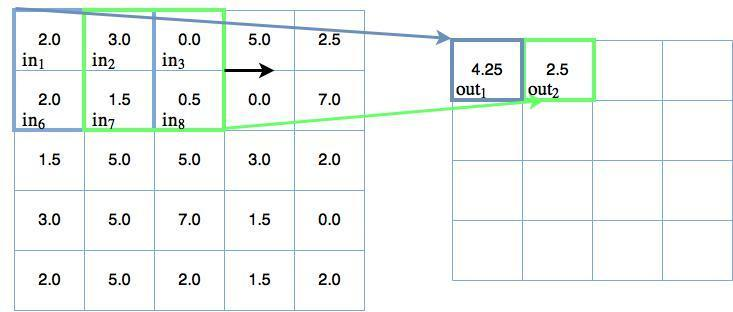
The first thing to understand in a Convolutional Neural Network is the actual convolution part. This is a fancy mathematical word for what is essentially a moving window or filter across the image being studied. This moving window applies to a certain neighborhood of nodes as shown below – here, the filter applied is (0.5 x the node value)
Only two outputs have been shown in the diagram above, where each output node is a map from a 2 x 2 input square. The weight of the mapping of each input square, as previously mentioned, is 0.5 across all four inputs. So the output can be calculated as:

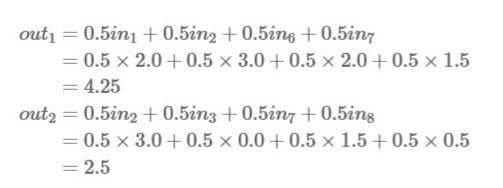

   **Рідкі з'єднання** - не кожен вузол першого шару / вводу підключений до кожного вузла другого шару. Це суперечить повністю пов'язаним нейронним мережам, де кожен вузол з'єднаний один з одним у наступному шарі.

   **Постійні параметри фільтра** - кожен фільтр має постійні параметри. Іншими словами, коли фільтр рухається навколо зображення, однакові ваги застосовуються до кожного набору 2 х 2 вузлів. Кожен фільтр, як такий, може бути навчений виконувати певну специфічну трансформацію вхідного простору. Тому кожен фільтр має певний набір ваг, які застосовуються для кожної операції згортання - це зменшує кількість параметрів.

   **Зауважте** - це не означає, що кожна вага є постійною у фільтрі. У наведеному вище прикладі ваги були [0,5, 0,5, 0,5, 0,5], але могли так само легко бути чимось на зразок [0,25, 0,1, 0,8, 0,001]. Все залежить від того, як навчається кожен фільтр

Ці дві властивості конволюційних нейронних мереж можуть різко зменшити кількість параметрів, які потрібно навчити порівняно з повністю пов'язаними нейронними мережами.
Наступним кроком у структурі конволюційної нейронної мережі є передача результату операції згортання за допомогою нелінійної функції активації - як правило, деякої версії функції активації ReLU. Це забезпечує стандартне нелінійне поведінку, яким відомі нейронні мережі.

Процес, що бере участь у цьому згортковому блоці, часто називають **feature mapping**  - це стосується ідеї, що кожен згортковий фільтр може бути навчений "шукати" різні особливості зображення, які потім можуть бути використані при класифікації. 
Перш ніж перейти до наступної основної особливості конволюційних нейронних мереж, що називається об'єднанням, ми розглянемо цю ідею відображення функцій та каналів у наступному розділі.


# Feature mapping and multiple channels

Як уже згадувалося раніше, оскільки вага окремих фільтрів утримується постійним, оскільки вони застосовуються над вхідними вузлами, вони можуть бути навчені вибирати певні функції з вхідних даних. У випадку із зображеннями вона може навчитися розпізнавати звичайні геометричні об'єкти, такі як лінії, ребра та інші фігури, що складають об’єкти. Ось звідки походить функція відображення назви. Через це будь-який шар згортки потребує декількох фільтрів, які підготовлені для виявлення різних особливостей. Отже, попередню діаграму фільтру, що рухається, потрібно оновити, щоб виглядати приблизно так:

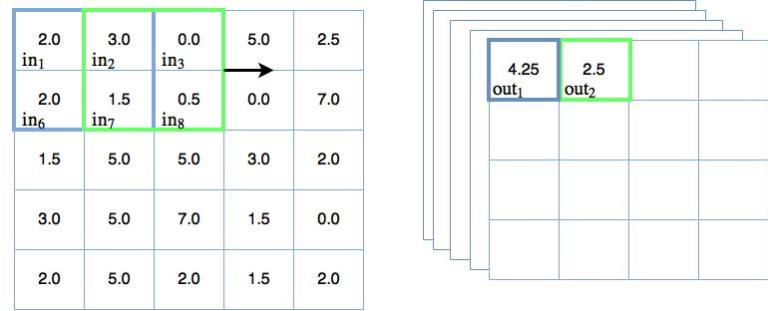

Тепер ви можете побачити на правій частині діаграми вгорі, що є кілька складених виходів з операції згортання. Це тому, що є кілька підготовлених фільтрів, які виробляють власний 2D-вихід (для 2D-зображення). Ці кілька фільтрів зазвичай називають каналами в глибокому навчанні. Кожен з цих каналів у кінцевому підсумку буде навчений виявляти певні ключові особливості зображення. Вихід шару згортання для зображення сірого масштабу, такого як набір даних MNIST, насправді матиме 3 виміри - 2D для кожного з каналів, потім інший вимір для кількості різних каналів.

Якщо вхід сам по собі багатоканальний, як у випадку з кольоровим RGB-зображенням (один канал для кожного R-G-B), вихід фактично буде 4D. На щастя, будь-яка бібліотека глибокого навчання, яка вартує її солі, включаючи PyTorch, зможе легко впоратися з усім цим картографуванням. Нарешті, не забувайте, що вихід операції згортання передаватиметься через активацію для кожного вузла.

# Pooling


Є дві основні переваги об’єднання в конволюційних нейронних мережах. Це:
    
    - Це зменшує кількість параметрів у вашій моделі шляхом процесу, званого вниз-вибіркою
    
    - Це робить виявлення функцій більш надійними щодо орієнтації об'єкта та змін масштабу
    
То що таке об'єднання? Це ще одна техніка типу розсувного вікна, але замість того, щоб застосовувати ваги, які можна тренувати, вона застосовує статистичну функцію певного типу над вмістом її вікна. Найпоширеніший тип об’єднання називається max pooling, і він застосовує функцію max () над вмістом вікна. Є й інші варіанти, такі як середнє об'єднання (яке бере середнє статистичне значення вмісту), які також використовуються в деяких випадках. У цьому підручнику ми зупинимося на максимальному об'єднанні. На схемі нижче показаний приклад операції максимального об'єднання:

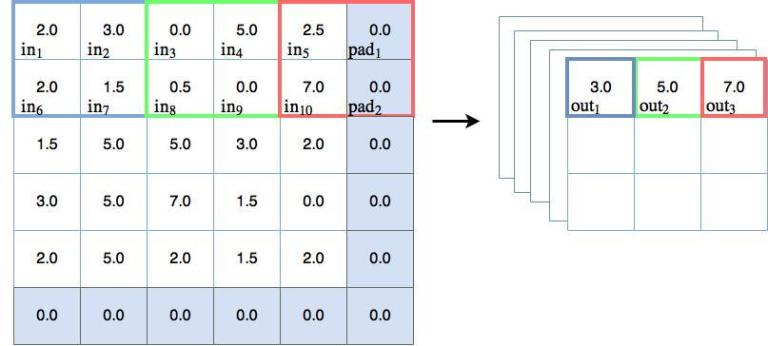



### Basics

На наведеній діаграмі ви можете спостерігати за чинним максимальним об'єднанням. Для першого вікна, синього, ви бачите, що максимальне об'єднання видає 3,0, що є максимальним значенням вузла у вікні 2 × 2. Аналогічно для зеленого вікна 2 × 2 воно виводить максимум 5,0 і максимум 7,0 для червоного вікна. Це досить прямо.

### Strides and down-sampling

На діаграмі об'єднання вище ви помітите, що вікно об'єднання кожного разу зміщується вправо на 2 місця.  **This is called a stride of 2**. На схемі вище, крок показаний лише у напрямку x, але, якщо метою було запобігти перекриття вікон об'єднання, то крок також повинен бути 2 у напрямку y. Іншими словами, крок фактично задається як [2, 2]. Важливо зауважити, що якщо об'єднання кроку більше, ніж 1, то розмір виводу зменшиться. Як можна спостерігати вище, вхід 5 x 5 зменшується до виходу 3 x 3. Це гарна річ - вона називається **down-sampling**, і вона зменшує кількість відстежуваних параметрів у моделі.

### Padding

Інша річ, яку слід помітити на діаграмі об'єднання вище, - це те, що на вхід 5 x 5 додано додатковий стовпець і рядок - це робить ефективний розмір простору для об'єднання рівним 6 x 6. Це для того, щоб 2 x 2 Вікно об'єднання може правильно працювати з кроком [2, 2] і називається **padding**. Ці вузли в основному є манекеновими вузлами - оскільки значення цих макетних вузлів дорівнюють 0, вони в основному невидимі для операції максимального об'єднання. Прокладки потрібно враховувати при побудові нашої конволюційної нейронної мережі в PyTorch.
Гаразд, тепер ми зрозуміли, як об’єднання працює в конволюційних нейронних мережах, і наскільки це корисно при низхідній вибірці, але що ще це робить? Чому максимальний пул використовується так часто?
Prokladky

### Why is pooling used in convolutional neural networks?

На додаток до функції відбору проб вниз, об'єднання використовується в конволюційних нейронних мережах, щоб зробити виявлення певних ознак дещо інваріантним щодо масштабу та зміни орієнтації. Інший спосіб думати про те, що об'єднує, це те, що він узагальнює більш низьку, більш складну інформацію. Давайте уявимо випадок, коли у нас є згорткові фільтри, які під час тренінгу вчаться виявляти цифру "9" у різних орієнтаціях на вхідних зображеннях. Для того, щоб згорнута нейронна мережа навчилася правильно класифікувати зовнішній вигляд "9" на зображенні, її потрібно певним чином "активувати", коли "9" знайдеться в будь-якому місці зображення, незалежно від розміру чи орієнтації цифра є (крім випадків, коли вона виглядає як "6", тобто). Об'єднання може допомогти з цим вищим рівнем, узагальненим вибором функцій, як показано на діаграмі нижче:

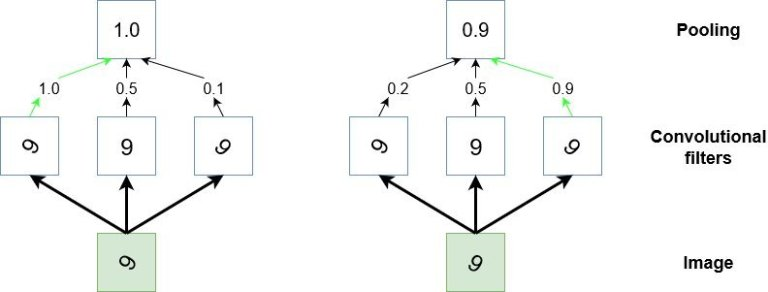

